In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [245]:
import keras 
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.vgg16 import VGG16

In [3]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

In [312]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, Dropout, AveragePooling2D
from keras.optimizers import *
from keras.layers import BatchNormalization

In [289]:
base_model = VGG16(weights = 'imagenet', include_top= False, input_shape = (128,128,3))

In [290]:
for layer in base_model.layers:
    layer.trainable = False

In [291]:
x = Flatten()(base_model.output)

In [292]:
prediction = Dense(7, activation = 'softmax')(x)

In [293]:
model = Model(inputs = base_model.input, outputs= prediction)

In [62]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [324]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   #shear_range = 0.2,
                                    #zoom_range = 0.2,
                                    #horizontal_flip = True
                                  )

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [326]:
train_path =  "images/train"
test_path = "images/validation"
validation_path =  "emotions/validation"

In [327]:
from random import shuffle


train_set = train_datagen.flow_from_directory(directory = train_path,
                                             target_size=(48, 48),
                                             color_mode= 'grayscale',
                                             batch_size = 128,
                                             shuffle = True,
                                             class_mode = 'categorical' )

Found 28821 images belonging to 7 classes.


In [328]:
test_set = validation_datagen.flow_from_directory(directory = test_path,
                                             target_size=(48, 48),
                                             color_mode= 'grayscale',
                                             batch_size = 128,
                                             shuffle = True,
                                             class_mode = 'categorical' )

Found 7066 images belonging to 7 classes.


In [213]:
validation_set = validation_datagen.flow_from_directory(directory = validation_path,
                                             target_size=(224,224),
                                             color_mode= 'rgb',
                                             batch_size = 128,
                                             class_mode = 'categorical' )

Found 7066 images belonging to 7 classes.


In [255]:
train_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [284]:
t_img, label = train_set.next()

def plotImages(img_arr, label):
    count = 0
    for im, l in zip(img_arr, label):
        plt.imshow(im)
        plt.title(im.shape)
        plt.axis = False
        plt.show()

        count += 1
        if count == 10:
            break


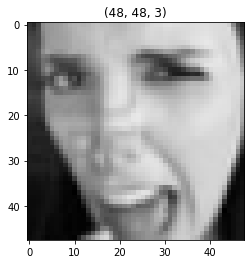

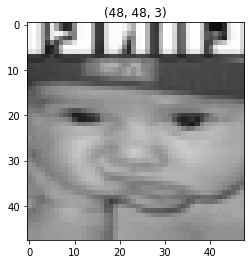

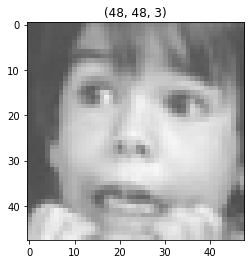

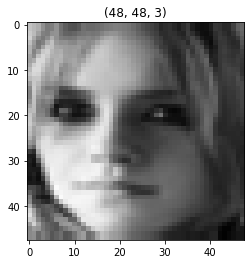

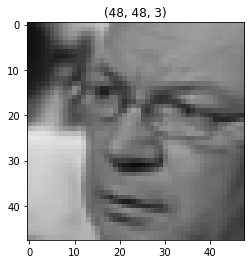

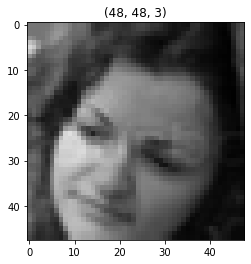

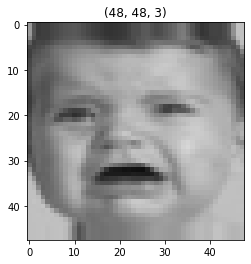

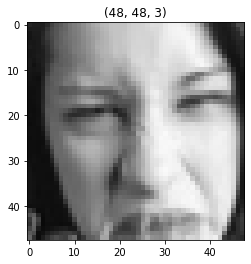

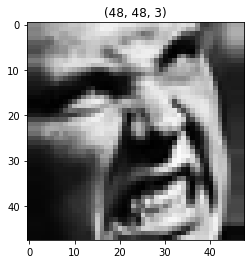

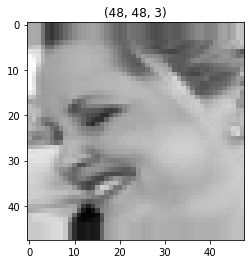

In [329]:
plotImages(t_img, label)

In [318]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor = 'val_accuracy', min_delta= 0.01, patience= 5, verbose =1, mode= 'auto')

mc = ModelCheckpoint(filepath = 'best_model.h5', monitor = 'val_accuracy', verbose =1, save_best_only= True, mode = 'auto')

call_back = [es, mc]

In [299]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [220]:
350//9

38

In [319]:
hist = model.fit_generator(train_set,
                            steps_per_epoch= train_set.n//64,
                            epochs = 30, 
                            validation_data = test_set,
                            validation_steps= test_set.n//64,
                            callbacks= [es, mc] )

C:\Users\HR\AppData\Local\Temp/ipykernel_4460/3787808186.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_set,


Epoch 1/30
 22/100 [=====>........................] - ETA: 13:57 - loss: 2.0622 - accuracy: 0.2104

KeyboardInterrupt: 

In [172]:
from keras.models import load_model

In [173]:
model = load_model('best_model.h5')

In [170]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

No handles with labels found to put in legend.


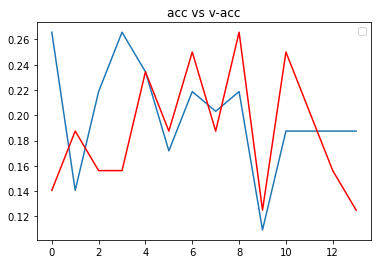

In [176]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')
plt.legend()
plt.title('acc vs v-acc')
plt.show()

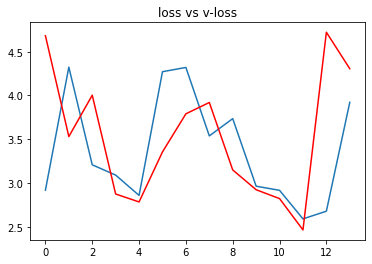

In [175]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')
plt.title('loss vs v-loss')
plt.show()

In [330]:
def my_model():
    model = Sequential()
    input_shape = (48, 48, 1)
    model.add(Conv2D(64, (5,5), input_shape = input_shape, activation = 'relu', padding = 'same'))
    model.add(Conv2D(64, (5,5), activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128, (5,5), activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same'))
    model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())

    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))

    model.add(Activation('softmax'))

    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

    return model

model = my_model()
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000001818A97F310>>

In [332]:
hist = model.fit_generator(train_set,
                            steps_per_epoch= train_set.n//128,
                            epochs = 20, 
                            validation_data = test_set,
                            validation_steps= test_set.n//128,
                            callbacks= [es, mc] )

C:\Users\HR\AppData\Local\Temp/ipykernel_4460/1598900668.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_set,


Epoch 1/20
225/225 [==============================] - ETA: 0s - loss: 1.6610 - accuracy: 0.3592 
Epoch 1: val_accuracy improved from 0.27930 to 0.29886, saving model to best_model.h5
225/225 [==============================] - 2520s 11s/step - loss: 1.6610 - accuracy: 0.3592 - val_loss: 1.9213 - val_accuracy: 0.2989
Epoch 2/20
225/225 [==============================] - ETA: 0s - loss: 1.3192 - accuracy: 0.5017 
Epoch 2: val_accuracy improved from 0.29886 to 0.35724, saving model to best_model.h5
225/225 [==============================] - 9377s 42s/step - loss: 1.3192 - accuracy: 0.5017 - val_loss: 1.6647 - val_accuracy: 0.3572
Epoch 3/20
225/225 [==============================] - ETA: 0s - loss: 1.1252 - accuracy: 0.5755
Epoch 3: val_accuracy improved from 0.35724 to 0.56250, saving model to best_model.h5
225/225 [==============================] - 1363s 6s/step - loss: 1.1252 - accuracy: 0.5755 - val_loss: 1.1566 - val_accuracy: 0.5625
Epoch 4/20
225/225 [==============================]

In [ ]:
model.evaluate()

In [159]:
y_pred =model.predict(validation_set)

44/44 [==============================] - 45s 1s/step


In [164]:
y_pred = np.argmax(y_pred, axis=0)

In [165]:
y_pred

0